<a href="https://colab.research.google.com/github/AKSHITHA-CHILUKA/Akshitha-GlucoSense-Infy-Nov24/blob/AKSHITHA-CHILUKA-patch-2/Diabities_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/diabetes_data.csv", delimiter=";")


In [2]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [3]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

The info() output provides information about data types, non-null counts, and memory usage, helping identify potential missing values and assess the dataset’s structure.

In [4]:
print(df.describe())


              age    polyuria  polydipsia  sudden_weight_loss    weakness  \
count  520.000000  520.000000  520.000000          520.000000  520.000000   
mean    48.028846    0.496154    0.448077            0.417308    0.586538   
std     12.151466    0.500467    0.497776            0.493589    0.492928   
min     16.000000    0.000000    0.000000            0.000000    0.000000   
25%     39.000000    0.000000    0.000000            0.000000    0.000000   
50%     47.500000    0.000000    0.000000            0.000000    1.000000   
75%     57.000000    1.000000    1.000000            1.000000    1.000000   
max     90.000000    1.000000    1.000000            1.000000    1.000000   

       polyphagia  genital_thrush  visual_blurring     itching  irritability  \
count  520.000000      520.000000       520.000000  520.000000    520.000000   
mean     0.455769        0.223077         0.448077    0.486538      0.242308   
std      0.498519        0.416710         0.497776    0.500300    

describe() gives summary statistics for numerical features like age, showing mean, min, max, and quartiles, which can help you detect outliers.

In [5]:
print(df['class'].value_counts())

class
1    320
0    200
Name: count, dtype: int64


value_counts() on the target variable (class) shows the balance between classes, providing insights into whether the dataset might be imbalanced.

In [6]:
# prompt: # Check data types and missing values

# Check data types and missing values
print("Data Types and Missing Values:")
print(df.dtypes.astype(str) + " | Missing: " + df.isnull().sum().astype(str))

Data Types and Missing Values:
age                    int64 | Missing: 0
gender                object | Missing: 0
polyuria               int64 | Missing: 0
polydipsia             int64 | Missing: 0
sudden_weight_loss     int64 | Missing: 0
weakness               int64 | Missing: 0
polyphagia             int64 | Missing: 0
genital_thrush         int64 | Missing: 0
visual_blurring        int64 | Missing: 0
itching                int64 | Missing: 0
irritability           int64 | Missing: 0
delayed_healing        int64 | Missing: 0
partial_paresis        int64 | Missing: 0
muscle_stiffness       int64 | Missing: 0
alopecia               int64 | Missing: 0
obesity                int64 | Missing: 0
class                  int64 | Missing: 0
dtype: object


**Univariate Analysis: Gender Distribution**

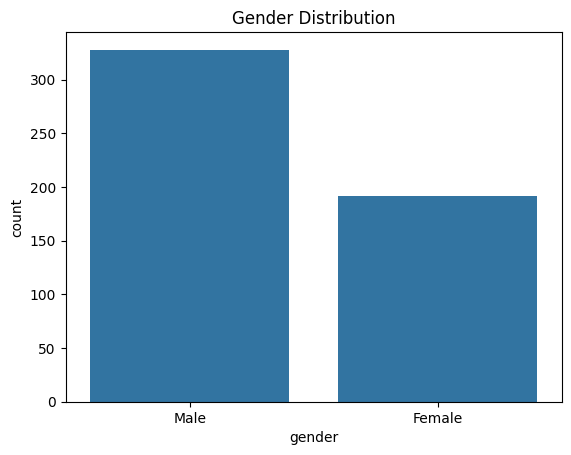

In [7]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


This bar plot shows the count of each gender in the dataset. Understanding gender distribution helps assess whether there’s a potential gender bias or imbalance, which could impact results, especially in healthcare data.

**Univariate Analysis: Age Distribution**

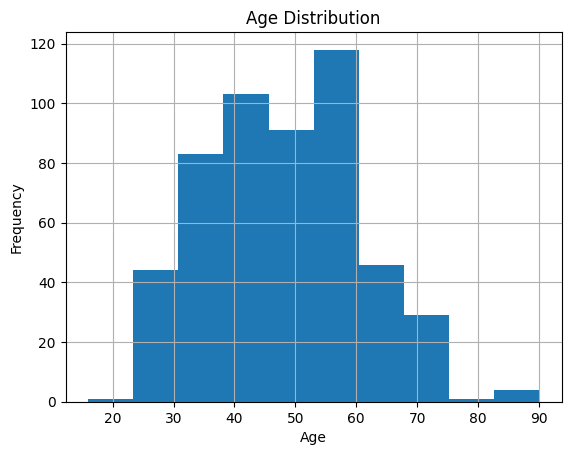

In [8]:
df['age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


The histogram illustrates the distribution of ages in the dataset. This gives a sense of the dataset’s age range and helps identify if it’s skewed towards a particular age group. Age distributions are important as certain age groups may be more prone to certain health conditions.

This box plot shows the distribution of age for each class. If there’s a significant difference between the age distributions across classes, age might be a key predictor. For example, if one class tends to have a higher median age, it may indicate a correlation between age and the target variable.

**Bivariate Analysis: Polyuria vs. Class**

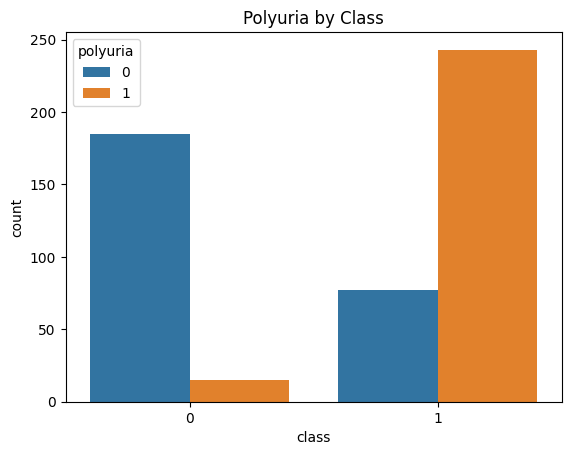

In [9]:
sns.countplot(x='class', hue='polyuria', data=df)
plt.title('Polyuria by Class')
plt.show()


The count plot shows the distribution of the polyuria feature for each class. If certain symptoms, like polyuria, are more prevalent in one class, this feature could be a strong indicator for prediction. Examining such relationships between symptoms and class can reveal critical patterns in the dataset.

**Multivariate Analysis: Pair Plot**

The pair plot allows you to visually inspect the relationships between pairs of features, with points colored by class. It helps identify separability between classes based on feature combinations, providing insights into the data's linear or nonlinear relationships.


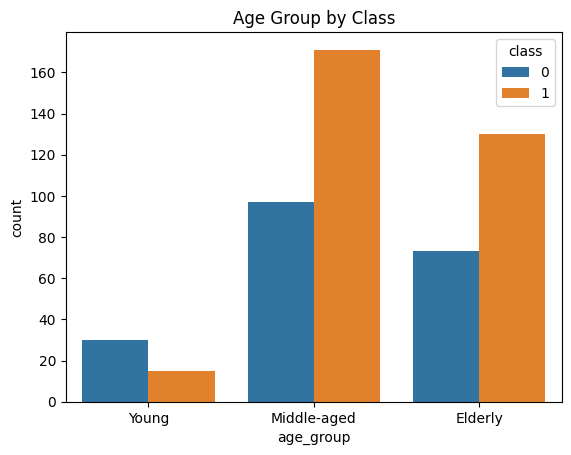

In [10]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 80], labels=['Young', 'Middle-aged', 'Elderly'])
sns.countplot(x='age_group', hue='class', data=df)
plt.title('Age Group by Class')
plt.show()


In [11]:
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class']


In [12]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
X = df.drop('class', axis=1)
y = df['class']


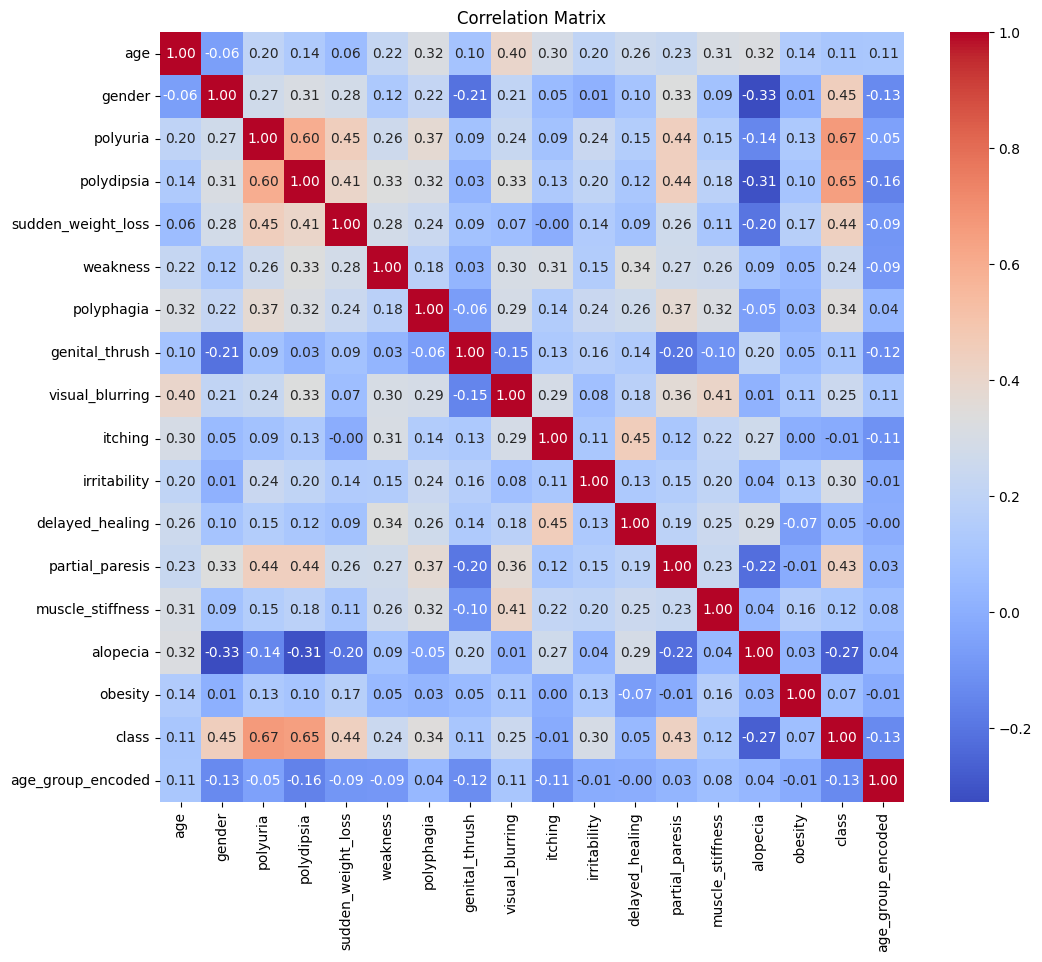

In [13]:

df['age_group_encoded'] = pd.factorize(df['age_group'])[0]
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

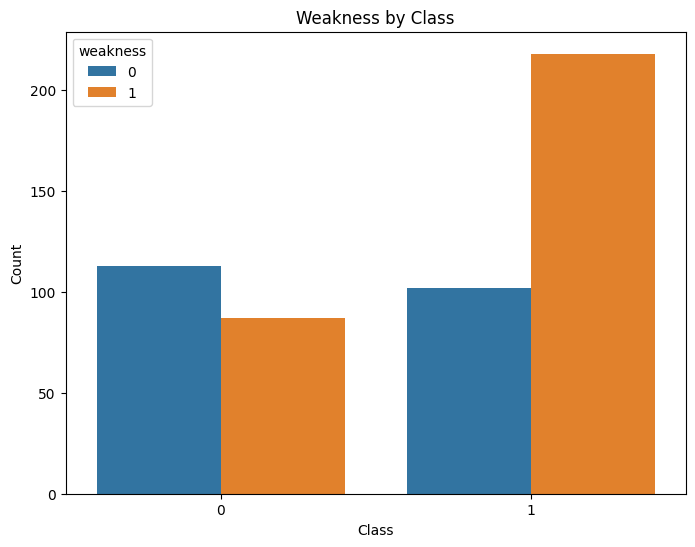

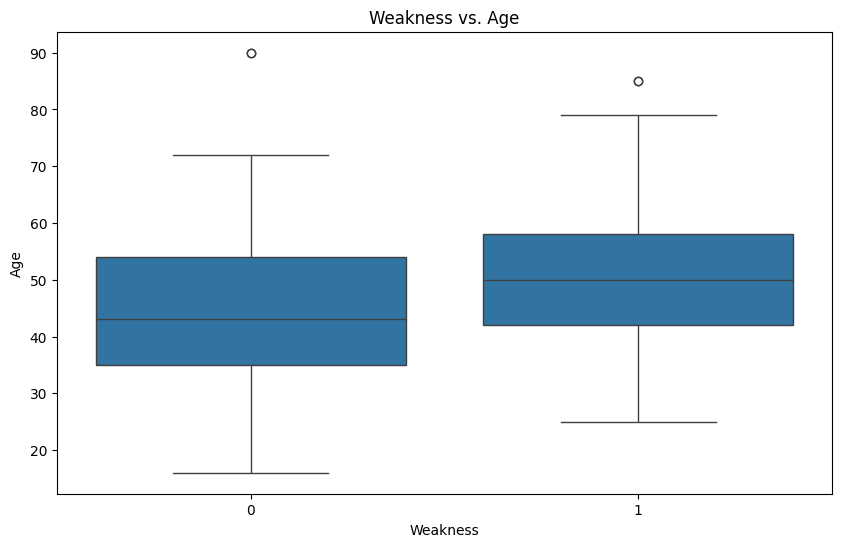

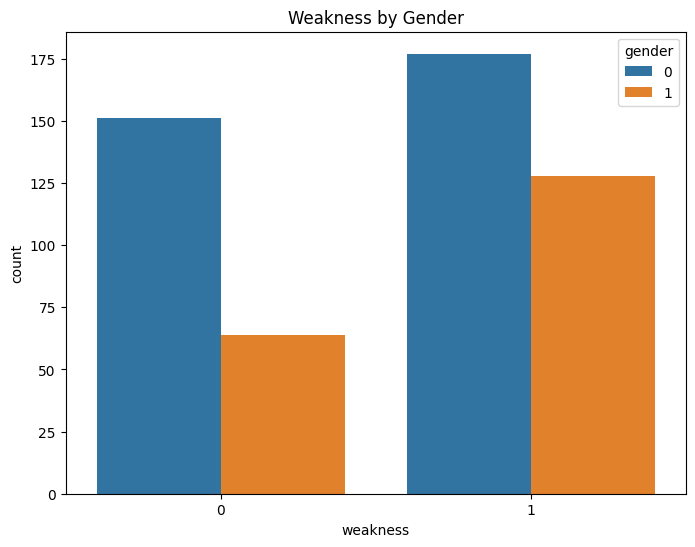

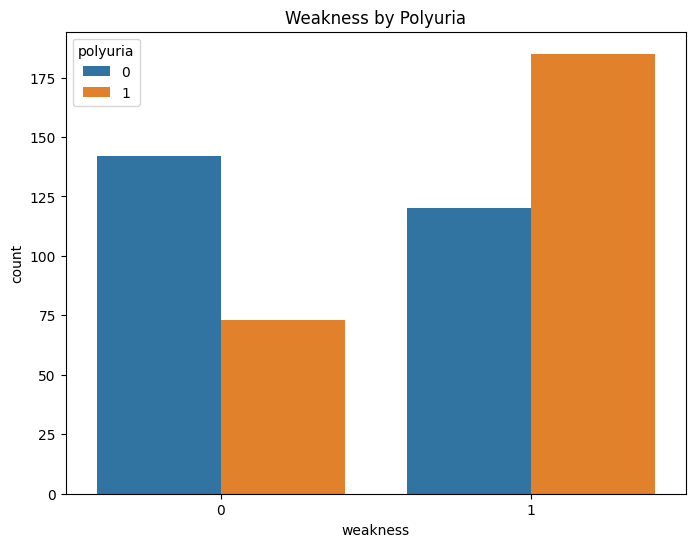

In [14]:

plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='weakness', data=df)
plt.title('Weakness by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='weakness', y='age', data=df)
plt.title('Weakness vs. Age')
plt.xlabel('Weakness')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='weakness', hue='gender', data=df)
plt.title('Weakness by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='weakness', hue='polyuria', data=df)
plt.title('Weakness by Polyuria')
plt.show()



People with weakness are more likely to have diabities


In [15]:
df[df['class'] == 'Positive']

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group,age_group_encoded


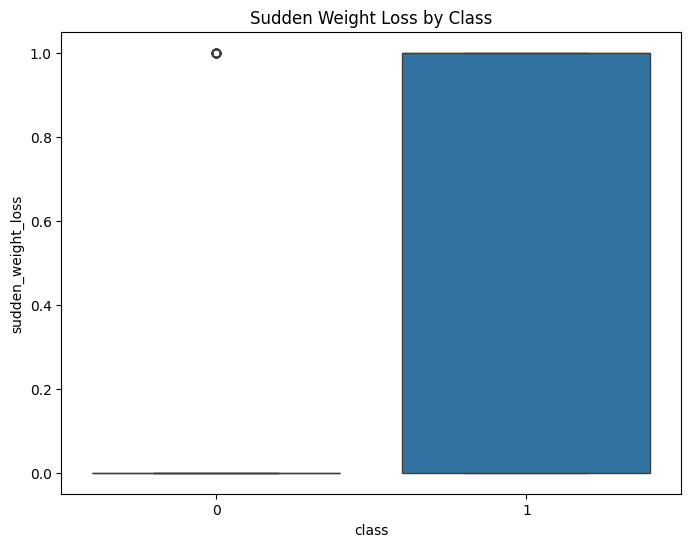

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='sudden_weight_loss', data=df)
plt.title('Sudden Weight Loss by Class')
plt.show()

people with sudden weight loss also tend to have diabities

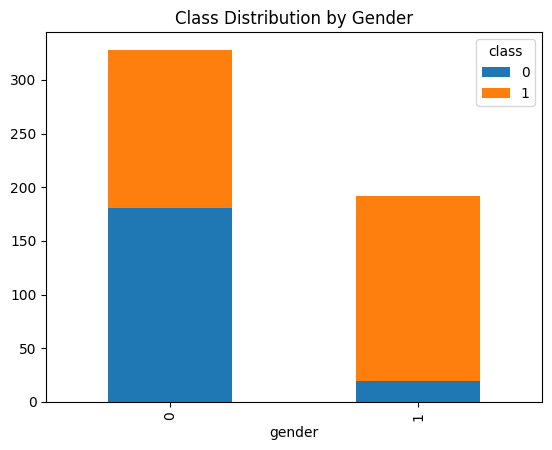

In [17]:
pd.crosstab(df['gender'], df['class']).plot(kind='bar', stacked=True)
plt.title('Class Distribution by Gender')
plt.show()


most men have diabities and women with diabities are less

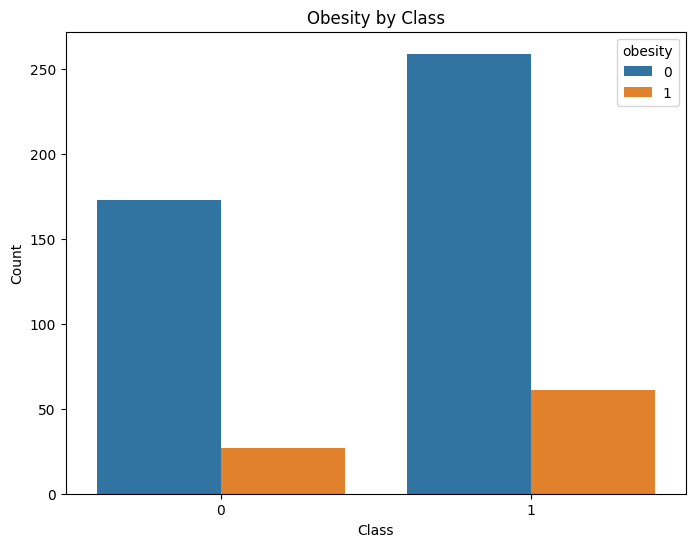

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='obesity', data=df)
plt.title('Obesity by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

obesity does not have much impact on diabities

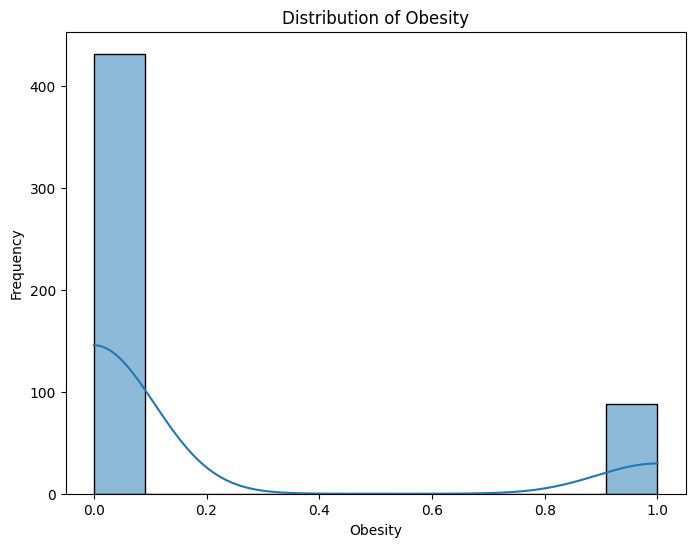

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['obesity'], kde=True)
plt.title('Distribution of Obesity')
plt.xlabel('Obesity')
plt.ylabel('Frequency')
plt.show()

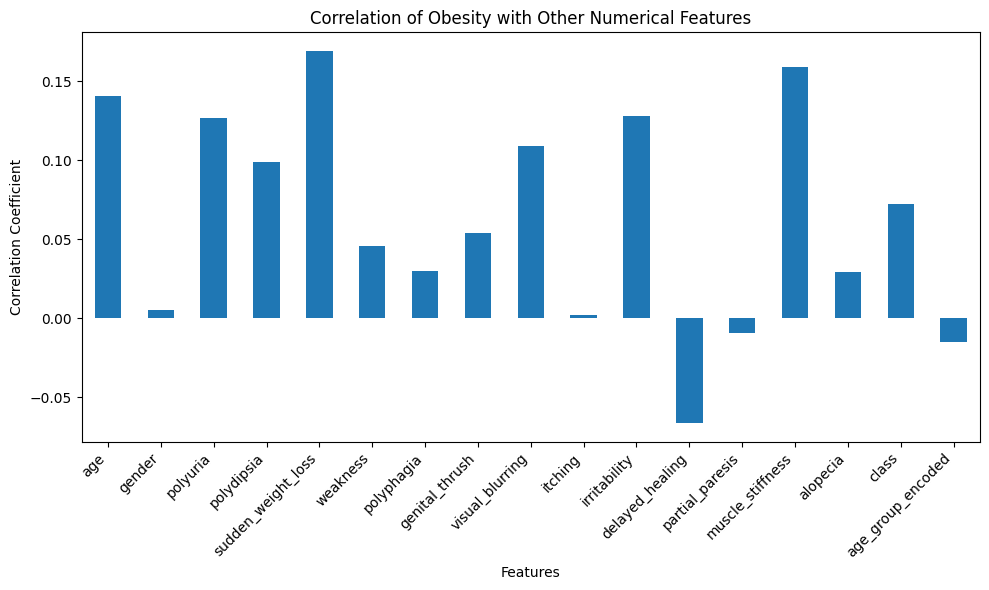

In [20]:
numerical_features = df.select_dtypes(include=np.number).columns
obesity_correlations = df[numerical_features].corr()['obesity'].drop('obesity')

plt.figure(figsize=(10, 6))
obesity_correlations.plot(kind='bar')
plt.title('Correlation of Obesity with Other Numerical Features')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

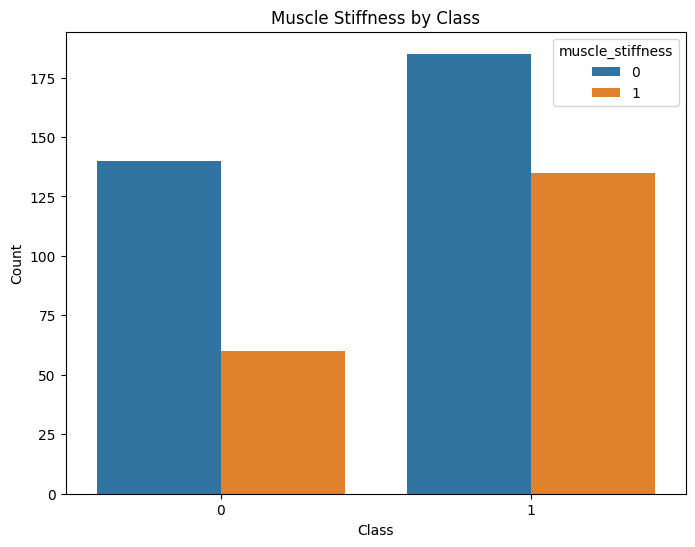

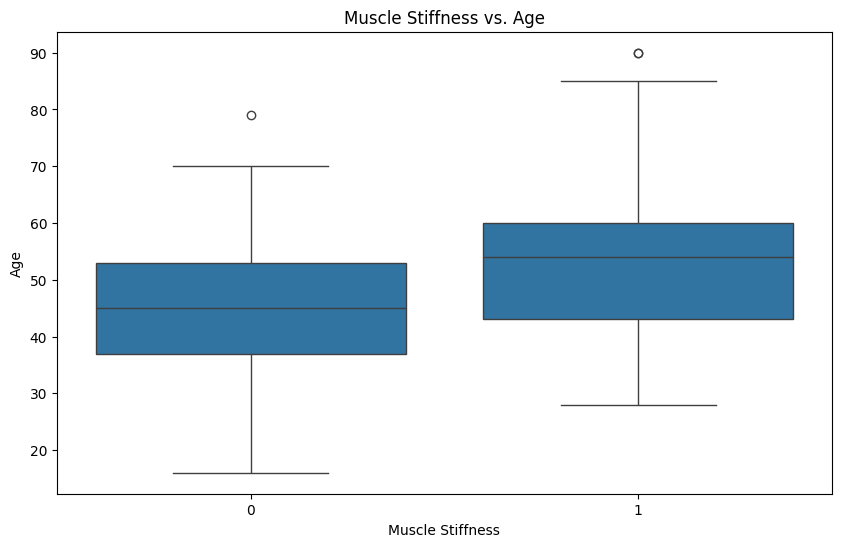

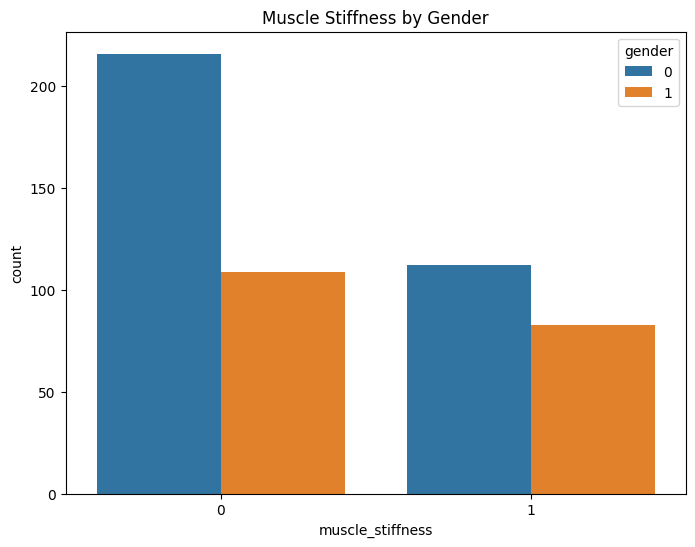

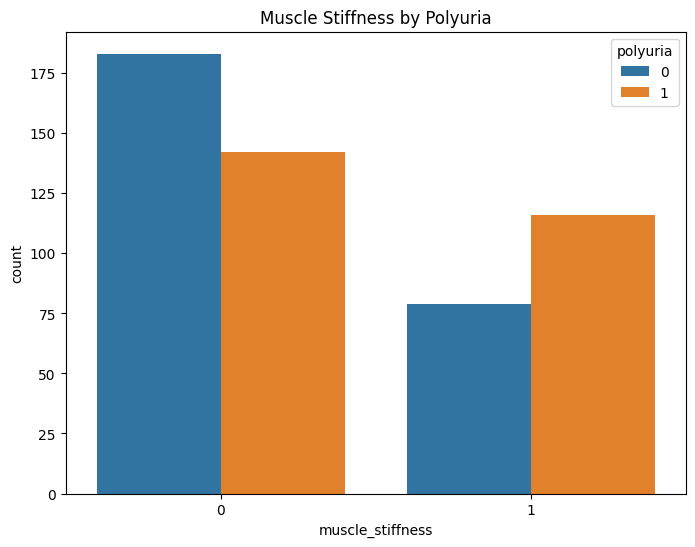

In [21]:


plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='muscle_stiffness', data=df)
plt.title('Muscle Stiffness by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='muscle_stiffness', y='age', data=df)
plt.title('Muscle Stiffness vs. Age')
plt.xlabel('Muscle Stiffness')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='muscle_stiffness', hue='gender', data=df)
plt.title('Muscle Stiffness by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='muscle_stiffness', hue='polyuria', data=df)
plt.title('Muscle Stiffness by Polyuria')
plt.show()

muscle stiffness has more impact in men rather than women

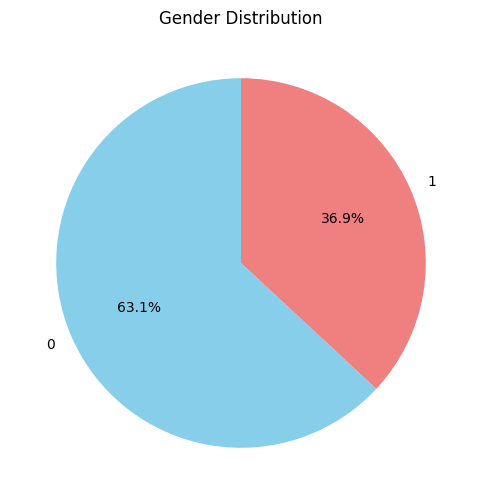

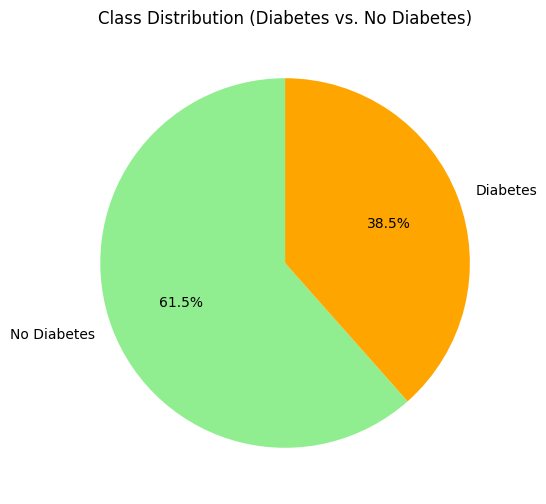

In [22]:
# Pie chart for Gender distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title('Gender Distribution')
plt.show()

# Pie chart for Class distribution
class_counts = df['class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts,
    labels=['No Diabetes', 'Diabetes'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'orange']
)
plt.title('Class Distribution (Diabetes vs. No Diabetes)')
plt.show()


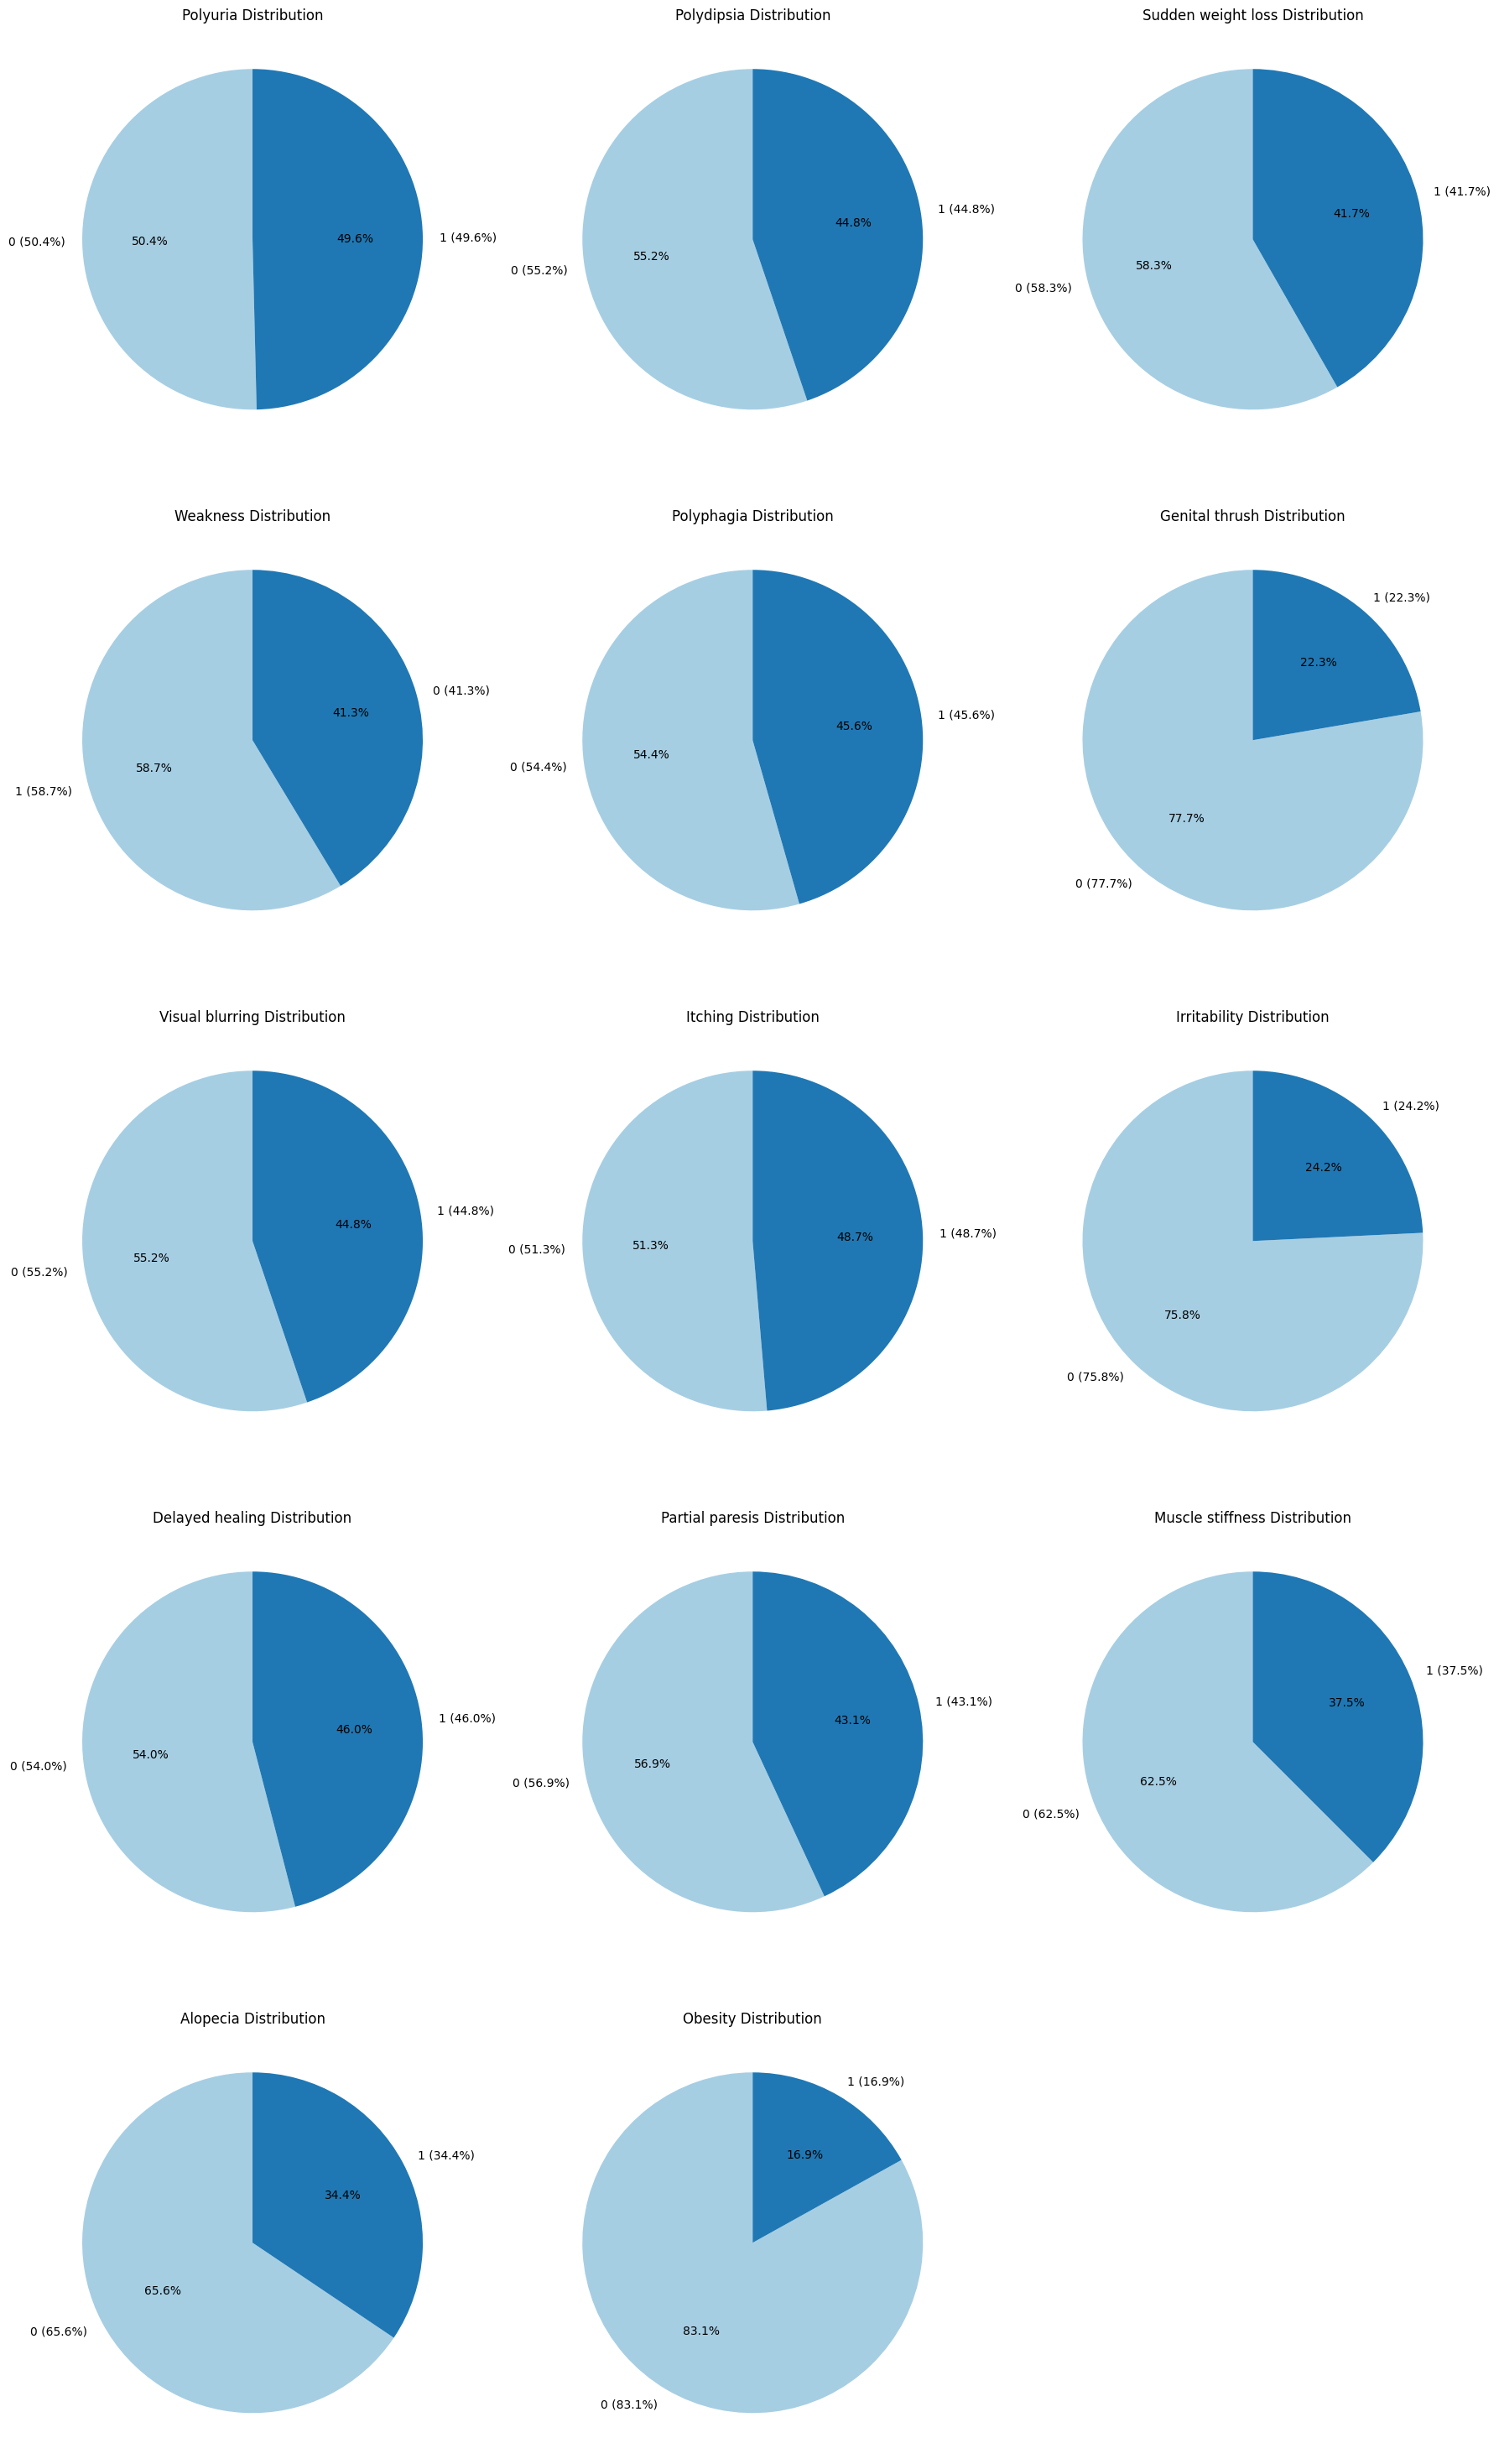

In [23]:

categorical_columns = [
    'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
    'irritability', 'delayed_healing', 'partial_paresis',
    'muscle_stiffness', 'alopecia', 'obesity'
]


rows = (len(categorical_columns) + 2) // 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    labels = [f'{index} ({value}%)' for index, value in zip(counts.index, (counts / counts.sum() * 100).round(1))]

    axes[i].pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors[:len(counts)]
    )
    axes[i].set_title(f'{column.replace("_", " ").capitalize()} Distribution', fontsize=12)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Analysis of Dataset**

**Polyuria (Frequent Urination):**

Roughly half of the individuals (50.4%) did not report polyuria, while the other half (49.6%) did.

This indicates an almost equal distribution, making it an important factor for further analysis.


**Polydipsia (Excessive Thirst):**

A slight majority of individuals (55.2%) did not experience polydipsia, while 44.8% did.

This suggests that excessive thirst is a common symptom but not as universal.

**Sudden Weight Loss:**

About 58.3% of individuals did not experience sudden weight loss, but 41.7% did.

This symptom is relatively prevalent and may warrant investigation as a diagnostic indicator.

**Weakness:**

Weakness was reported by a significant majority (58.7%) of the individuals, with 41.3% not experiencing it.

This highlights that weakness is a leading symptom among the respondents.

**Polyphagia (Excessive Hunger):**

Around 54.4% of the individuals did not report polyphagia, whereas 45.6% did.

This nearly balanced distribution suggests it may be a moderately common symptom.

**Genital Thrush:**

A large majority (77.7%) did not experience genital thrush, while 22.3% did.

This indicates it is a less common symptom but still relevant for a subset of individuals.

**Visual Blurring:**

Nearly half (44.8%) of the individuals experienced visual blurring, while 55.2% did not.

This suggests a significant portion of individuals might face vision-related symptoms.

**Itching:**

Itching is another fairly balanced symptom, with 48.7% experiencing it and 51.3% not.

This highlights its potential relevance in the dataset.

**Irritability:**

A notable 75.8% of individuals did not report irritability, while 24.2% did.

Irritability is less common but still worth considering in symptom analysis.

**Delayed Healing:**

About 46.0% of individuals reported delayed healing, while 54.0% did not.

This symptom is also quite prevalent and deserves attention in diagnostics.

**Partial Paresis (Weakness in Movement):**

Nearly 43.1% of individuals reported partial paresis, with 56.9% not experiencing it.

This shows it’s a relevant symptom for a significant minority.

**Muscle Stiffness:**

A majority (62.5%) did not report muscle stiffness, while 37.5% did.
This makes it a moderately common symptom worth noting.

**Alopecia (Hair Loss):**

About 34.4% of individuals reported alopecia, while 65.6% did not.
This indicates that hair loss is less common but still present in the dataset.

**Obesity:**

A large majority (83.1%) of individuals were not classified as obese, while only 16.9% were.

This suggests that obesity is not a primary factor in this dataset but may still play a role in some cases.


In [24]:

categorical_columns = [
    'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
    'irritability', 'delayed_healing', 'partial_paresis',
    'muscle_stiffness', 'alopecia', 'obesity'
]

for column in categorical_columns:
    print(f"Column: {column.replace('_', ' ').capitalize()}")
    counts = df[column].value_counts()
    percentages = (counts / counts.sum() * 100).round(1)

    for value, count, percent in zip(counts.index, counts.values, percentages.values):
        print(f"  Value: {value}, Count: {count}, Percentage: {percent}%")

    print('-' * 40)


Column: Polyuria
  Value: 0, Count: 262, Percentage: 50.4%
  Value: 1, Count: 258, Percentage: 49.6%
----------------------------------------
Column: Polydipsia
  Value: 0, Count: 287, Percentage: 55.2%
  Value: 1, Count: 233, Percentage: 44.8%
----------------------------------------
Column: Sudden weight loss
  Value: 0, Count: 303, Percentage: 58.3%
  Value: 1, Count: 217, Percentage: 41.7%
----------------------------------------
Column: Weakness
  Value: 1, Count: 305, Percentage: 58.7%
  Value: 0, Count: 215, Percentage: 41.3%
----------------------------------------
Column: Polyphagia
  Value: 0, Count: 283, Percentage: 54.4%
  Value: 1, Count: 237, Percentage: 45.6%
----------------------------------------
Column: Genital thrush
  Value: 0, Count: 404, Percentage: 77.7%
  Value: 1, Count: 116, Percentage: 22.3%
----------------------------------------
Column: Visual blurring
  Value: 0, Count: 287, Percentage: 55.2%
  Value: 1, Count: 233, Percentage: 44.8%
--------------------

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest

In [34]:
print(X.columns)


Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'age_group',
       'age_group_encoded'],
      dtype='object')


In [35]:
print(X['gender'].unique())


[0 1]


In [36]:
df.rename(columns={'OldName': 'NewName'}, inplace=True)


In [37]:
for col in X.columns:
    print(f"Column: {col}")
    print(X[col].unique())
    print("-" * 30)


Column: age
[40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
------------------------------
Column: gender
[0 1]
------------------------------
Column: polyuria
[0 1]
------------------------------
Column: polydipsia
[1 0]
------------------------------
Column: sudden_weight_loss
[0 1]
------------------------------
Column: weakness
[1 0]
------------------------------
Column: polyphagia
[0 1]
------------------------------
Column: genital_thrush
[0 1]
------------------------------
Column: visual_blurring
[0 1]
------------------------------
Column: itching
[1 0]
------------------------------
Column: irritability
[0 1]
------------------------------
Column: delayed_healing
[1 0]
------------------------------
Column: partial_paresis
[0 1]
------------------------------
Column: muscle_stiffness
[1 0]
------------------------------
Column: alopecia
[1 0]
-------------------------

In [41]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X is your DataFrame

# Identify categorical columns (e.g., 'gender', 'age' if it has categorical values)
categorical_cols = ['gender', 'age']  # Replace with your actual categorical columns

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # handle_unknown='ignore' for unseen values in test data
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the preprocessing pipeline to your data
X_scaled = preprocessor.fit_transform(X)

Explained Variance by each component: [0.22909202 0.13622395]


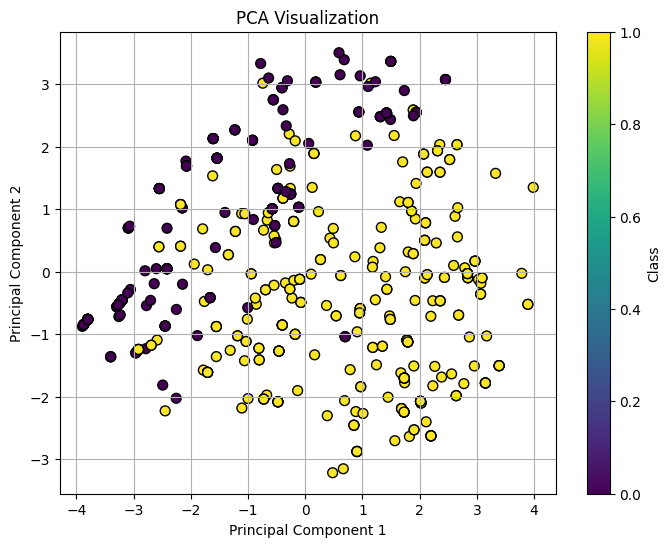

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Handle categorical data
X_encoded = X.copy()
for column in X_encoded.select_dtypes(include=['object', 'category', 'string']).columns: # Include 'category' and 'string' dtypes
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])

# Step 2: Normalize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")

# Step 5: Plot the PCA components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Class')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

-PC1 and PC2 represent the most significant axes of variation in data.

-They help to understand the key patterns in data and provide a way to reduce dimensionality while retaining most of the variability.